# Linear Regression with one feature

This notebook shows a first model that achieves around 45% MAPE on the validation set.

It uses only one feature 'living_area' and does not need any preprocessing (like OneHotEncoding).

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare data

In [39]:
# Load the train data
train_data = pd.read_csv('../data/houses_train.csv', index_col=0)

In [40]:
# Split data into features and labels.
X_data = train_data.drop(columns='price')
y_data = train_data['price']

In [60]:
# Split features and labels into train (X_train, y_train) and validation set (X_val, y_val).
X_train, X_val, y_train, y_val = train_test_split(X_data, y_data, stratify=X_data['object_type_name'], test_size=0.1, random_state=0)

# Define and train model

Here we do two steps:

1. We select a feature we want to use.
2. We train a LinearRegression model with only this feature.

In [61]:
from sklearn.linear_model import LinearRegression

In [62]:
# Define model
model = LinearRegression()

In [63]:
feature = 'living_area'

# 1. Feature selection: Here we only use this one features.
X_train_sub = X_train.loc[:, [feature]]

# (Extra) Clip the living_area to max 400
#X_train_sub.loc[X_train_sub.living_area > 400, 'living_area'] = 400

# (Extra) Remove houses with living_area > 400 from train data
#y_train = y_train.loc[X_train_sub.living_area <= 400]
#X_train_sub = X_train_sub.loc[X_train_sub.living_area <= 400]

Here we show what we are doing with `X_train_sub = X_train[[feature]]`.
In `X_train` we have all features, then we select only the feature `living_area`, so `X_train_sub` has only this feature left.

In [64]:
# Before
display(X_train.head())

# After
display(X_train_sub.head())

,lat,long,zipcode,municipality_name,build_year,object_type_name,living_area,num_rooms,water_percentage_1000,travel_time_private_transport,travel_time_public_transport,number_of_buildings_in_hectare,number_of_apartments_in_hectare,number_of_workplaces_in_hectare,number_of_workplaces_sector_1_in_hectare,number_of_workplaces_sector_2_in_hectare,number_of_workplaces_sector_3_in_hectare,population_in_hectare
id,,,,,,,,,,,,,,,,,,
4754,47.364311,9.456674,9056,Gais,2000,Einfamilienhaus,180.0,6.0,0.000000,58.0,118.0,5,5.0,0,0,0,0,12
1974,47.475063,9.560755,9425,Thal,1975,Einfamilienhaus,194.0,6.5,0.000595,59.0,104.0,6,6.0,3,0,0,3,7
16495,46.668003,7.567967,3762,Erlenbach im Simmental,1970,Einfamilienhaus,970.0,5.0,0.007734,30.0,55.0,2,2.0,3,0,0,3,6
4731,47.074661,7.553367,3309,Kernenried,2014,Wohnung,123.0,5.5,0.000000,16.0,44.0,2,10.0,0,0,0,0,25
17514,47.333012,8.621600,8126,Zumikon,1971,Wohnung,160.0,5.0,0.002416,10.0,8.0,6,29.0,3,0,0,3,59


,living_area
id,
4754,180.0
1974,194.0
16495,970.0
4731,123.0
17514,160.0


Now we train the model with this single feature in `X_train_sub` and the outputs/prices in `y_train`.

In [65]:
# 2. Train (fit) the model with the train data.
_ = model.fit(X_train_sub, y_train)

## Predict and evaluate prices for the validation set

In [66]:
# Feature selection: Here we only use this one features.
X_val_sub = X_val.loc[:, [feature]]

# (Extra) Clip the living_area to max 400
#X_val_sub.loc[X_val_sub.living_area > 400, 'living_area'] = 400

In [67]:
# Predict with the model the validation data.
y_val_pred = model.predict(X_val_sub)

In [68]:
# How good are we on the validation data?
print(mean_absolute_percentage_error(y_val, y_val_pred))

0.44500292244940437


Because we only have one feature we can plot our model in a 2d plot.\
The x-axis being the feature `living_area`, The y-axis being the label `price`.

In [69]:
def plot_linear_regression(model, X, y):
    plt.figure(figsize=(15,10))
    
    # plot data points
    plt.scatter(X, y, color='black', marker='.')
    
    # plot linear model    
    xs = np.linspace(0, X.max())
    ys = model.coef_ * xs + model.intercept_ # model.predict(xs)
    plt.plot(xs, ys)

    # set title, axis-names, x-/y-limits
    plt.title('LinearRegression with one feature')
    plt.xlabel(feature)
    plt.ylabel('price')
    plt.xlim(0)
    plt.ylim(0, y.max())

    plt.show()

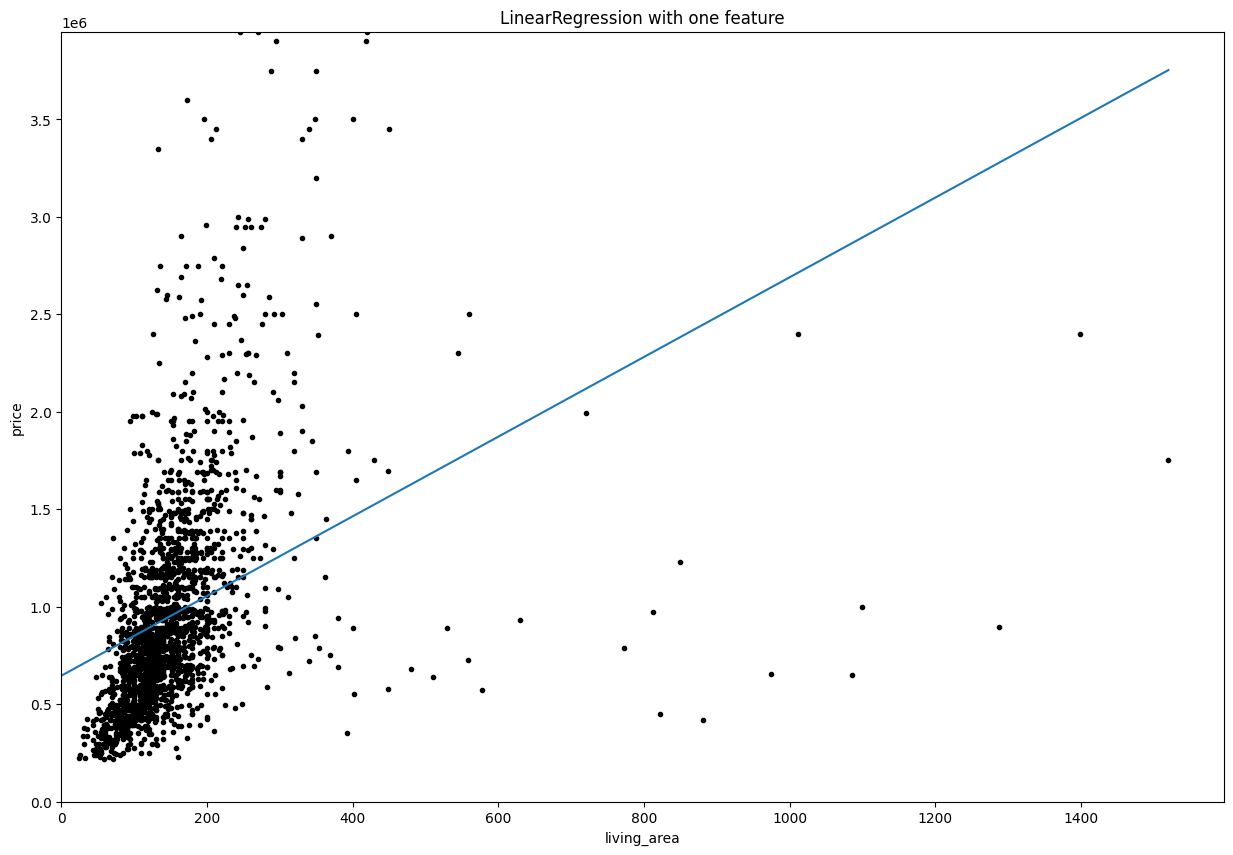

In [70]:
plot_linear_regression(model, X_val_sub, y_val)

We can see that we have some outliers with large living areas but relatively small prices. They have a large impact on our simple linear model, skewing the predictions for the majority of our data points.

To quickly improve our model we have several options:
 * analyze those houses, to see if there is an error in the data
 * clip the living_area of all houses to e.g. 400
 * remove those outliers from the trainings set
 * train a more complex model

In this example we show how to clip the living_area to 400, by commenting in the lines after `# (Extra) Clip the living_area to max 400`. Notice how we need to do that seperately for the train-/validation-/test-sets. In a later notebook we show how to do that, as part of a scikit-learn-Pipeline.

## What next step do we suggest?

Make a LinearRegression model with the `living_area` and one categorical feature.
We suggest to use the `zipcode` or `object_type_name` feature. Additionally you could bundle the necessary steps (OneHotEncoding, OutlierHandling, Regression) into a [sklearn-Pipeline](https://scikit-learn.org/stable/modules/compose.html#pipeline)

To reduce the number of categories you can use the `zipcode_2` feature, which represents the first two digits of the `zipcode` and therefore has only maximal 100 categories. You can create the `zipcode_2` feature with the following code:

```python
X_train['zipcode_2'] = (X_train['zipcode'] // 100).astype("string")
```